<a href="https://colab.research.google.com/github/yarkalm/salary_analysis/blob/main/Salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ зарплат**
Решение задач по аналитике данных связанных с зарплатами сотрудников некой компании.

**Анализ состоял из следующих этапов:**


1.   Приведение всех денежных выплат в единому виду (приведение к доллару по актуальному курсу на момент выплаты)
2.   Приведение к единому виду списка стран работников

3. Обработка пустых, некорреткных, недостабщих и т.д. значений. (Удаление, дополнение, имитация по моде, медиане  т.д.)

4. Построение различных графиков для визуализации и анализа: 

  * 4.1. Размеры заработных плат

  * 4.2. Влияние опыта работы на зарплату

  * 4.3. Зависимость зароботной платы и выплат от образования




5. Добавление новых признаков для анализа:

  * 5.1. Население города работника.

  * 5.2. Средняя заработная плата работника, основанная на возрасте и опыте работы




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

Теперь давайте скачаем нужные данные


In [14]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

Cloning into 'REU-Ml-SCHOOL'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 1.16 MiB | 3.39 MiB/s, done.


In [15]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
24373,5/5/2021 15:04:20,35-44,Insurance,AVP & Actuary,NaN,180000,54000.0,USD,NaN,NaN,United States,Massachusetts,Springfield,11 - 20 years,11 - 20 years,College degree,Woman,White
17405,4/28/2021 20:22:38,25-34,Social Work,Hospital social worker,NaN,"76,000",NaN,USD,NaN,NaN,USA,Rhode Island,providence,8 - 10 years,5-7 years,Master's degree,Woman,White
9535,4/27/2021 18:12:34,35-44,"Accounting, Banking & Finance",Relationship Manager,NaN,"85,000",15000.0,USD,NaN,NaN,USA,Washington,Seattle,11 - 20 years,2 - 4 years,Master's degree,Woman,White
25018,5/6/2021 1:52:16,35-44,"Accounting, Banking & Finance",Controller,NaN,115000,NaN,USD,NaN,NaN,US,Florida,Jacksonville,11 - 20 years,11 - 20 years,College degree,Woman,White
26505,6/26/2021 0:24:09,25-34,Health care,emt,NaN,37400,NaN,USD,NaN,NaN,us,New Jersey,hazlet,8 - 10 years,5-7 years,Some college,Man,Black or African American


Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [16]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary', 
              'Amount of monetary compensation', 'Currency', 
              'Currency special', 'Income context', 'Country', 
              'State in USA', 'City', 'Work experience all', 
              'Work expirince in current field', 'Education', 'Gender', 'Race' 
              ]
df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
17183,4/28/2021 19:36:24,25-34,Art & Design,Senior Art Director Design,NaN,"95,000",5000.0,USD,NaN,NaN,USA,New York,Brooklyn,8 - 10 years,5-7 years,Some college,Man,White
10803,4/27/2021 22:20:58,45-54,"Accounting, Banking & Finance",Staff Accountant,Assigned to Fixed Assets,"70,000",0.0,USD,NaN,NaN,USA,Michigan,Marysville,21 - 30 years,21 - 30 years,Master's degree,Woman,White
722,4/27/2021 11:14:04,35-44,Government and Public Administration,Director of Housing Initiatives,Working title is Director of Compliance and An...,"115,000",0.0,USD,NaN,NaN,United States,Washington,Seattle,21 - 30 years,11 - 20 years,Master's degree,Woman,White
18398,4/29/2021 0:11:41,25-34,Education (Higher Education),Assistant Professor,NaN,"125,000",NaN,USD,NaN,NaN,United States,California,Davis,2 - 4 years,2 - 4 years,PhD,Woman,Black or African American
14446,4/28/2021 14:42:26,25-34,Business or Consulting,Design Researcher,NaN,"135,000",13500.0,USD,NaN,NaN,United States,California,San Diego,8 - 10 years,2 - 4 years,Master's degree,Woman,White


# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару. 
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете. 
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html).

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
!pip install forex-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 KB 10.2 MB/s eta 0:00:00


In [19]:
from datetime import datetime
from forex_python.converter import CurrencyRates
from sklearn.utils import shuffle

In [20]:
df.head(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [21]:
new_df = df[['Timestamp','Salary','Amount of monetary compensation','Currency']]

In [22]:
for i in range(len(df)):
  new_df.loc[i, 'Salary'] = int(new_df.loc[i, 'Salary'].replace(',',''))

In [23]:
import requests
import urllib3

def get_rate(base_cur, dest_cur, date_obj):
    urllib3.disable_warnings()
    date_str = date_obj.strftime('%Y-%m-%d')
    payload = {'base': base_cur, 'rtype': 'fpy'}
    source_url = "https://theforexapi.com/api/" + date_str
    response = requests.get(source_url, params=payload, verify=False)
    if response.status_code == 200:
        rates = response.json().get('rates').get(dest_cur)
        return rates

In [24]:
for i in range(len(new_df)):
  currency = new_df.loc[i, 'Currency'] 
  if currency != 'USD' and currency != 'Other' and currency != 'AUD/NZD':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    course = get_rate('USD', currency, dt)
    new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
    new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
    new_df.loc[i, 'Currency'] = 'USD'
  elif currency == 'AUD/NZD':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    course = get_rate('USD', 'AUD', dt)
    new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
    new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
    new_df.loc[i, 'Currency'] = 'USD'
  elif currency == 'Other':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    try:
      course = get_rate('USD', new_df.loc[i, 'Currency special'], dt)
      new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
      new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
      new_df.loc[i, 'Currency'] = 'USD'
    except KeyError:
      new_df = new_df.drop(index = i)
      continue

После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [25]:
df['Salary'] = new_df['Salary']
df['Currency'] = new_df['Currency']
df['Amount of monetary compensation'] = new_df['Amount of monetary compensation']

In [26]:
df = df.drop(columns=['Currency', 'Currency special'],axis = 1)

In [27]:
df.head(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.000000,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.000000,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000,NaN,NaN,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000,10000.000000,NaN,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000,0.000000,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [28]:
usa_names = ['United States', 'US', 'USA', 
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ', 
       'United states ','united states', 'United States of America ', 
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A', 
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States', 
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas', 
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas', 
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)', 
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America', 
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ', 
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America', 
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',   
           'United Kingdom', 'UK ', 'England/UK',   
           'UK', 'Great Britain ', 'Englang',     
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',      
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',         
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',     
           'United Kingdom.', 'Northern Ireland ', 'england',   
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',     
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',   
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ', 
           'Wales, UK', 'England, UK',  'Uk ',  'uk', 
           'Northern Ireland, United Kingdom', 'uk',   
           'UK, but for globally fully remote company','England, United Kingdom ','Unites kingdom ']

canada_names = ['Canada','canada', 'Canada', 'Canada, Ottawa, ontario', 'CANADA ', 
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ','Germany', 'germany', 'Company in Germany. I work from Pakistan.']

При помощи следующей ячейки были выявлены вручную около 6 значений, относящиеся к спискам USA, UK, Canada, German.

In [29]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.5 MB/s eta 0:00:00


In [30]:
country_names = df['Country'].unique()
other_countries = [x for x in country_names if x not in [*usa_names,*uk_names,*canada_names,*ger_names] and (len(x)>3 and len(x)<53)]
other_countries.remove('$2,175.84/year is deducted for benefits')
other_countries = sorted(other_countries)
print(*other_countries)

 New Zealand ARGENTINA BUT MY ORG IS IN THAILAND Afghanistan Africa Aotearoa New Zealand Argentina Australi Australia Australia  Australian  Austria Bangladesh Bangladesh  Belgium Belgium  Bermuda Bosnia and Herzegovina Brasil Brazil Brazil  Britain  Bulgaria Cambodia Catalonia Cayman Islands Chile China Colombia Congo Contracts Costa Rica Cote d'Ivoire Croatia  Cuba Currently finance Cyprus Czech Republic Czech Republic  Czech republic Czechia Danmark Denmark Denmark  Ecuador Eritrea Estonia FRANCE Finland France France  From New Zealand but on projects across APAC Ghana Global Greece Hartford Hong Kong Hong Kong  Hungary I.S. INDIA India Indonesia International  Ireland  Isle of Man Israel Italy Italy (South) Jamaica Japan Japan  Jersey, Channel islands Jordan Kenya Kuwait Latvia Liechtenstein Lithuania Luxembourg Luxemburg Mainland China Malaysia Malaysia  Malta Mexico Mexico  Morocco México NIGERIA Nederland Netherlands Netherlands  New Zealand New Zealand  New Zealand Aotearoa New

In [31]:
from fuzzywuzzy import process
from fuzzywuzzy.fuzz import ratio

In [32]:
set_countries = 'Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Channel Islands,Chile,China,Colombia,Comoros,Congo,Costa Rica,Côte dIvoire,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,DR Congo,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faeroe Islands,Finland,France,French Guiana,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Réunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome & Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,The Bahamas,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe'
set_countries =  set(set_countries.split(','))

In [33]:
for i in range(len(other_countries)):
  if other_countries[i] in set_countries:
    continue
  else:
    a = process.extractOne(other_countries[i], set_countries,scorer=ratio)
    if a[1]>75:
      #print(other_countries[i], ' - ', a[0])
      other_countries[i] = a[0]
other_countries = sorted(list(set(other_countries)))

In [77]:
for i in range(len(df)):
  country = df.loc[i, 'Country'] 
  if country in usa_names:
    df.loc[i, 'Country'] = 'USA'
  elif country in uk_names:
    df.loc[i, 'Country'] = 'UK'
  elif country in canada_names:
    df.loc[i, 'Country'] = 'Canada'
  elif country in ger_names:
    df.loc[i, 'Country'] = 'Germany'
  elif country in other_countries:
    continue  
  else:
    a = process.extractOne(country, set_countries,scorer=ratio)
    if a[1]>70:
      df.loc[i, 'Country'] = a[0]
    else:
      df.drop(i, axis = 0)
df.head(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Population,Mean salary
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4688346.0,8.082862e+05
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,129920.0,8.082862e+05
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,415501.0,1.011698e+06
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,1365787.0,8.082862e+05
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,484465.0,8.082862e+05
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,68165.0,1.011698e+06
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,560041.0,1.011698e+06
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,142847.0,8.082862e+05
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,2024074.0,9.605342e+05
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",417007.0,1.664418e+05


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [35]:
df.isnull().sum().sum()

59854

Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [36]:
df.isnull().sum()

Timestamp                              0
Age                                    0
Industry                              72
Job                                    0
Job context                        20712
Salary                               156
Amount of monetary compensation     7362
Income context                     24911
Country                                0
State in USA                        4982
City                                  75
Work experience all                    0
Work expirince in current field        0
Education                            214
Gender                              1201
Race                                 169
dtype: int64

In [37]:
df = df.fillna({'Amount of monetary compensation':0,
                'State in USA': 'Another Country',
                'City': 'Another Country',
                'Salary': df['Salary'].mode()[0]})

In [76]:
df.head(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Population,Mean salary
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4688346.0,8.082862e+05
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,129920.0,8.082862e+05
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,415501.0,1.011698e+06
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,1365787.0,8.082862e+05
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,484465.0,8.082862e+05
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,68165.0,1.011698e+06
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,560041.0,1.011698e+06
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,142847.0,8.082862e+05
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,2024074.0,9.605342e+05
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",417007.0,1.664418e+05


## Этап 2.2
Давайте теперь попробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent). 
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [39]:
from sklearn.impute import SimpleImputer
import numpy as np

In [40]:
edu = df[['Education']].values

In [41]:
edu

array([["Master's degree"],
       ['College degree'],
       ['College degree'],
       ...,
       [nan],
       ["Master's degree"],
       ['College degree']], dtype=object)

In [42]:
s_i = SimpleImputer(missing_values  = np.nan, strategy='most_frequent')

In [43]:
df['Education'] = s_i.fit_transform(edu)

In [44]:
df.head(30)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения. 

---

**Важно! Графики должны быть читаемыми**

In [45]:
import matplotlib.pylab as plt
import seaborn as sns

<Axes: xlabel='Salary'>

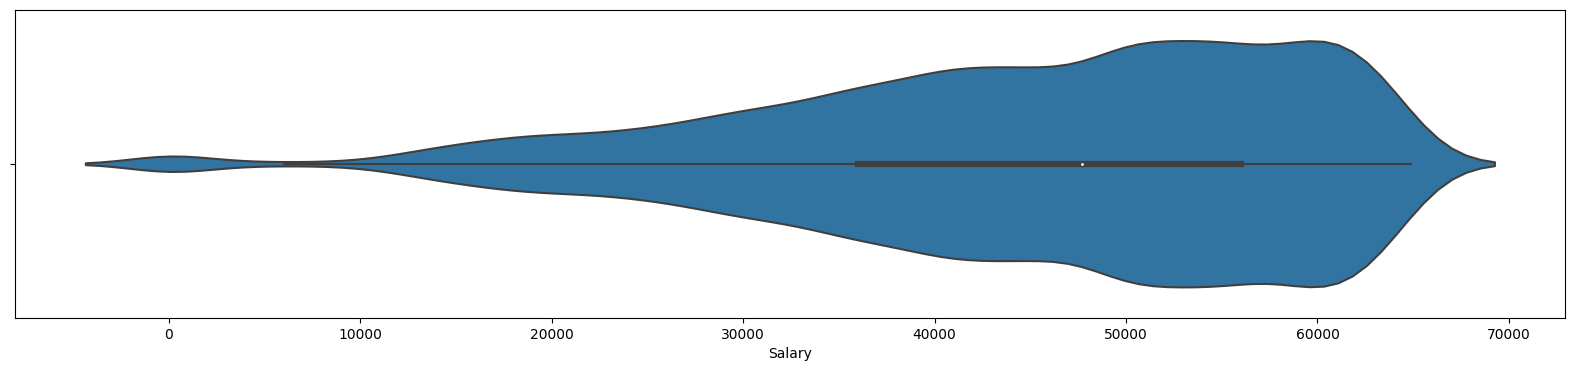

In [46]:
plt.figure(figsize = (20,4))
sns.violinplot(x=df['Salary'].sort_values().head(10280))

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты?

In [47]:
data = df.groupby(['Industry']).mean()['Salary'].head(10)

In [48]:
sns.set(style = 'whitegrid')

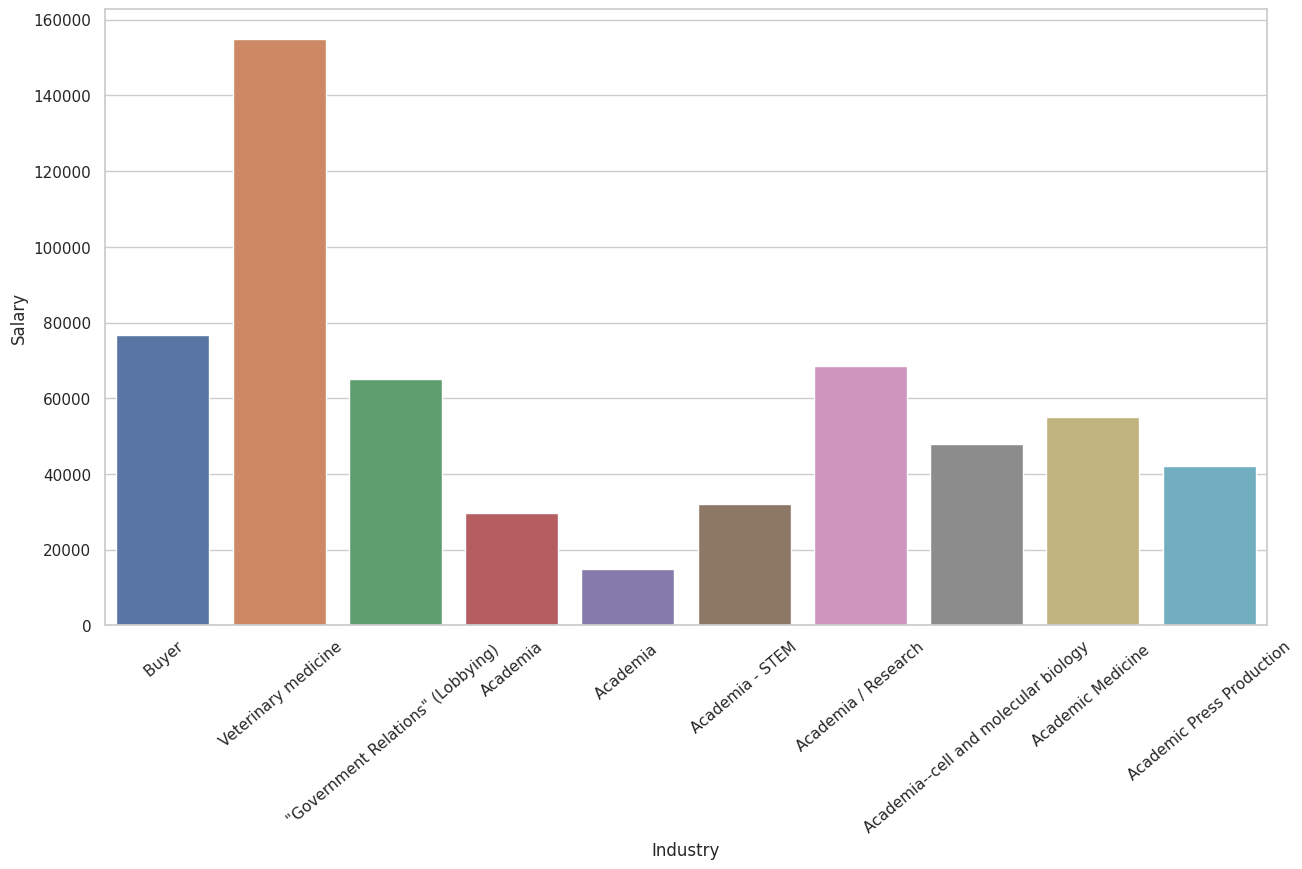

In [68]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = data.index,y = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

**2)** Влияет ли опыт работы на среднюю зарплату?

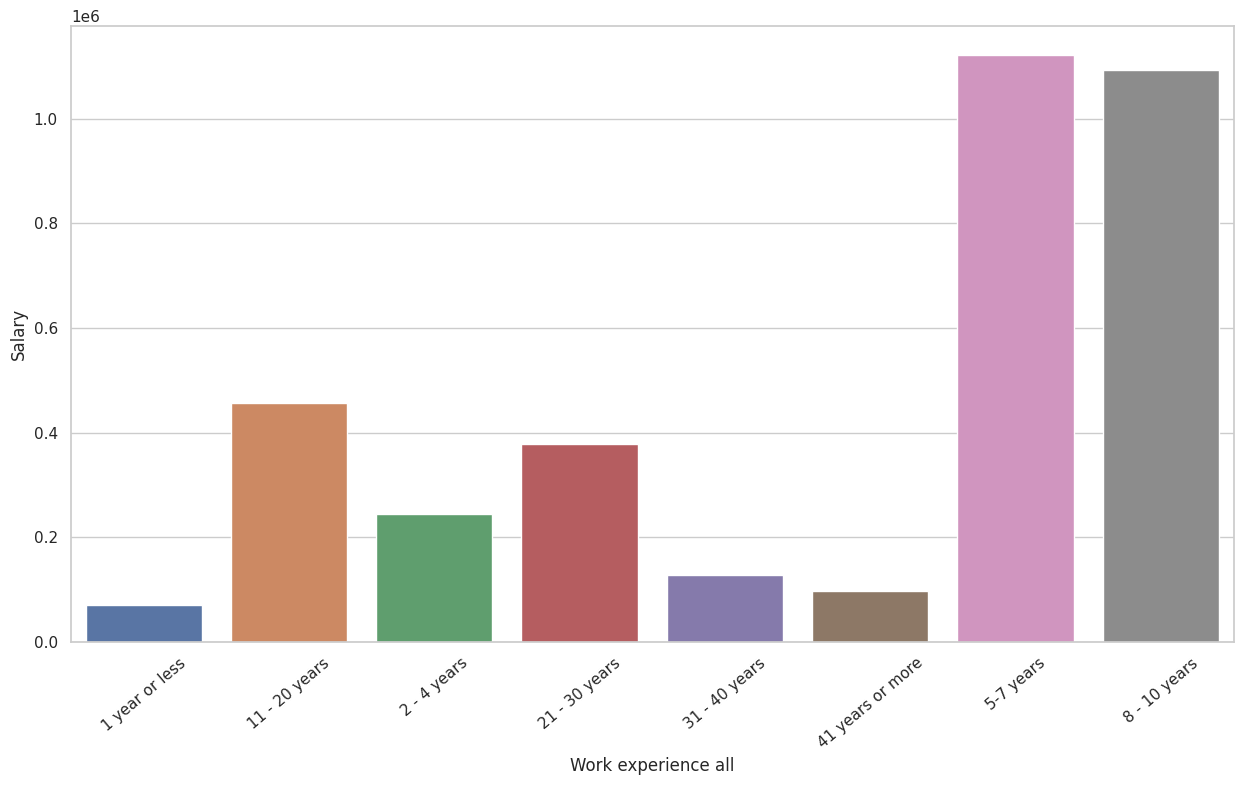

In [69]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df.groupby(['Work experience all']).mean()['Salary'].index,y = df.groupby(['Work experience all']).mean()['Salary'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

In [70]:
amount = df[df['Amount of monetary compensation'] > 0.0 ]['Amount of monetary compensation'].sort_values().head(4300)

<ipython-input-71-d71ef59d8d9f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)


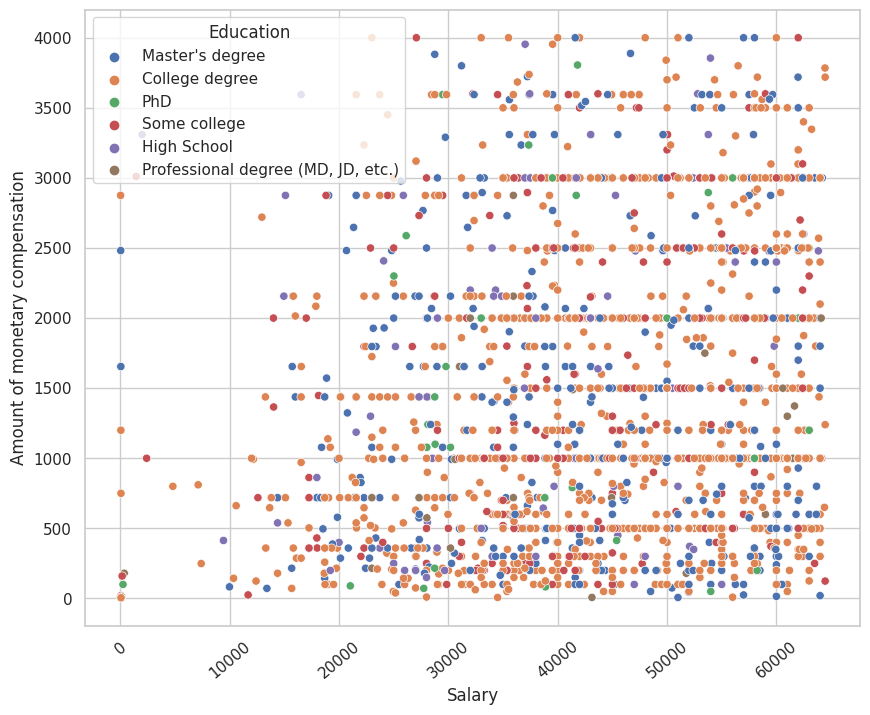

In [71]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x=df['Salary'].sort_values().head(10200), y=amount, hue = df['Education'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму. 

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv. 
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [53]:
city_df = pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv')

In [54]:
city_df = city_df[['city','population']]

In [55]:
population = []
for i in range(len(df)):
  try:
    population.append(city_df.loc[city_df['city']==df.loc[i,'City'],'population'].iloc[0])
  except: 
    population.append(np.nan)
    continue

In [56]:
df['Population'] = population

In [57]:
df.head(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Population
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4688346.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,129920.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,415501.0
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,1365787.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,484465.0


In [58]:
from itertools import product

In [59]:
set_age = set(df['Age'])
set_work_exp = set(df['Work expirince in current field'])

In [60]:
combinations = list(product(set_age,set_work_exp))
print("Количество различных комбинаций:",len(combinations))

Количество различных комбинаций: 56


In [73]:
print(*combinations)

('18-24', '21 - 30 years') ('18-24', '1 year or less') ('18-24', '31 - 40 years') ('18-24', '11 - 20 years') ('18-24', '41 years or more') ('18-24', '8 - 10 years') ('18-24', '2 - 4 years') ('18-24', '5-7 years') ('35-44', '21 - 30 years') ('35-44', '1 year or less') ('35-44', '31 - 40 years') ('35-44', '11 - 20 years') ('35-44', '41 years or more') ('35-44', '8 - 10 years') ('35-44', '2 - 4 years') ('35-44', '5-7 years') ('45-54', '21 - 30 years') ('45-54', '1 year or less') ('45-54', '31 - 40 years') ('45-54', '11 - 20 years') ('45-54', '41 years or more') ('45-54', '8 - 10 years') ('45-54', '2 - 4 years') ('45-54', '5-7 years') ('under 18', '21 - 30 years') ('under 18', '1 year or less') ('under 18', '31 - 40 years') ('under 18', '11 - 20 years') ('under 18', '41 years or more') ('under 18', '8 - 10 years') ('under 18', '2 - 4 years') ('under 18', '5-7 years') ('55-64', '21 - 30 years') ('55-64', '1 year or less') ('55-64', '31 - 40 years') ('55-64', '11 - 20 years') ('55-64', '41 y

In [62]:
mean_salary = {}

In [63]:
for cmb in combinations:
  mean_salary[cmb] = df.loc[(df['Age']==cmb[0]) & (df['Work expirince in current field']==cmb[1])]['Salary'].mean()

In [64]:
lst_mean_salary = []
for i in range(len(df)):
  lst_mean_salary.append(mean_salary[df.loc[i]['Age'],df.loc[i]['Work expirince in current field']])

In [65]:
df['Mean salary'] = lst_mean_salary

In [75]:
df.head(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Population,Mean salary
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4688346.0,8.082862e+05
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,129920.0,8.082862e+05
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,415501.0,1.011698e+06
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,1365787.0,8.082862e+05
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,484465.0,8.082862e+05
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,68165.0,1.011698e+06
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,560041.0,1.011698e+06
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,142847.0,8.082862e+05
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,2024074.0,9.605342e+05
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",417007.0,1.664418e+05


На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы